# 📘 Spectroscopy Peaks: Lorentzian Line Shape Analysis> Fit Lorentzian profiles to spectroscopic peaks⏱️ **20-25 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Physics** | 🔬 **Optics**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/physics/spectroscopy_peaks.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $I(\nu) = I_0 \frac{(\Gamma/2)^2}{(\nu - \nu_0)^2 + (\Gamma/2)^2}$**Where:**- $I_0$: Peak intensity- $\nu_0$: Center frequency- $\Gamma$: Full width at half maximum (FWHM)**Applications:** Atomic spectroscopy, laser physics, NMR---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def lorentzian(nu, I0, nu0, gamma):
    return I0 * (gamma/2)**2 / ((nu - nu0)**2 + (gamma/2)**2)

## Generate Spectral Data

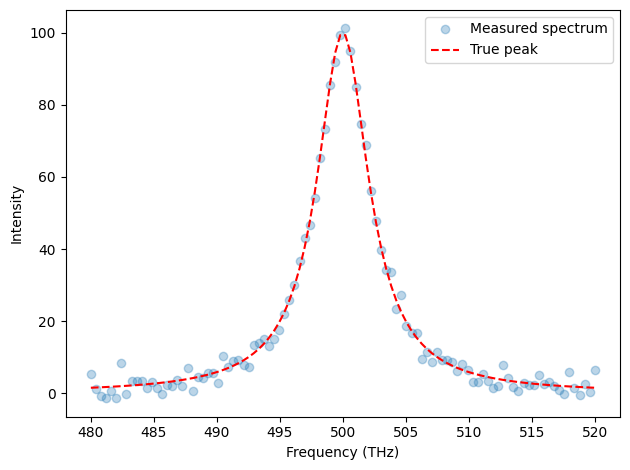

In [5]:
I0_true, nu0_true, gamma_true = 100, 500, 5  # THz
nu = np.linspace(480, 520, 100)
I_true = lorentzian(nu, I0_true, nu0_true, gamma_true)
I = I_true + np.random.normal(0, 2, len(nu))

plt.plot(nu, I, 'o', alpha=0.3, label='Measured spectrum')
plt.plot(nu, I_true, 'r--', label='True peak')
plt.xlabel('Frequency (THz)')
plt.ylabel('Intensity')
plt.legend()
plt.tight_layout()
plt.tight_layout()
plt.show()


## Fit Lorentzian Profile

In [6]:
popt, pcov = curve_fit(lorentzian, nu, I, p0=[95, 499, 4])
I0_fit, nu0_fit, gamma_fit = popt
perr = np.sqrt(np.diag(pcov))

print('Peak Analysis:')
print(f'  Center frequency (ν₀): {nu0_fit:.2f} ± {perr[1]:.2f} THz')
print(f'  Peak intensity (I₀):   {I0_fit:.1f} ± {perr[0]:.1f}')
print(f'  FWHM (Γ):              {gamma_fit:.2f} ± {perr[2]:.2f} THz')
print(f'\nQuality factor Q = ν₀/Γ = {nu0_fit/gamma_fit:.1f}')

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=5834.520121107314 | grad_norm=7451.9102 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=956.3043763746848 | grad_norm=1040.4196 | step=507.9783459951812 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=243.35464416078304 | grad_norm=338.7606 | step=507.9783459951812 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=210.4010051834423 | grad_norm=3.2916 | step=507.9783459951812 | nfev=4


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=4 | cost=210.39764403396913 | grad_norm=0.0290 | step=507.9783459951812 | nfev=5


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.216599s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=5 | final_cost=210.3976 | elapsed=1.217s | final_gradient_norm=1.5059e-04


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=2.200146s


INFO:nlsq.curve_fit:Curve fit completed total_time=2.2001 | final_cost=420.7953 | covariance_warning=False


Peak Analysis:
  Center frequency (ν₀): 500.03 ± 0.02 THz
  Peak intensity (I₀):   99.8 ± 0.9
  FWHM (Γ):              5.00 ± 0.07 THz

Quality factor Q = ν₀/Γ = 99.9


## Visualize Fit

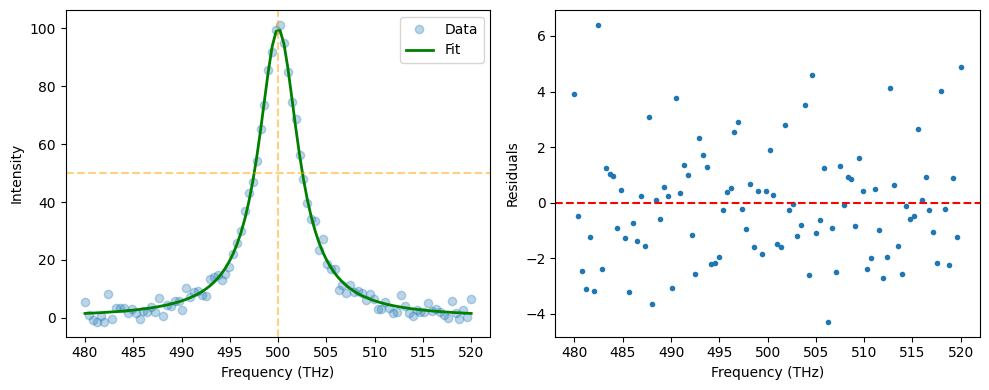

In [7]:
I_fit = lorentzian(nu, *popt)

fig = plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(nu, I, 'o', alpha=0.3, label='Data')
plt.plot(nu, I_fit, 'g-', linewidth=2, label='Fit')
plt.axvline(nu0_fit, color='orange', linestyle='--', alpha=0.5)
plt.axhline(I0_fit/2, color='orange', linestyle='--', alpha=0.5)
plt.xlabel('Frequency (THz)')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(122)
residuals = I - I_fit
plt.plot(nu, residuals, '.')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Frequency (THz)')
plt.ylabel('Residuals')

plt.tight_layout()
plt.tight_layout()
plt.show()


## Key Insights1. **Lorentzian shape** from natural broadening2. **FWHM** indicates spectral line width3. **Quality factor Q** measures line sharpness---